# Logistic Regression 逻辑回归建模

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix     #metrics 度量学

In [4]:
data = pd.read_csv('data/diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
X = data.iloc[:,:-1]  #数据分割
Y = data.iloc[:,-1]

X = np.array(X)
Y.count()

768

<function matplotlib.pyplot.show(close=None, block=None)>

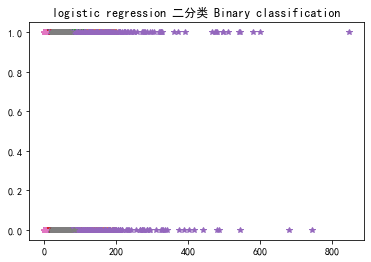

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示中文
plt.rcParams['axes.unicode_minus']=False#正常显示符号

plt.plot(X,Y,'*')
plt.title('logistic regression 二分类 Binary classification')
plt.show

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [22]:
logregression = LogisticRegression()
logregression.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
LogisticRegression(C=1.0,class_weight=None,dual=False, fit_intercept=True,
                  intercept_scaling=1,l1_ratio=None,max_iter=10000,
                  multi_class='auto',n_jobs=None,penalty='12',
                  random_state=None,solver='lbfgs',tol=0.0001,verbose=0,
                  warm_start=False)

LogisticRegression(max_iter=10000, penalty='12')

In [25]:
y_predict=logregression.predict(x_test)

## 准确率 Accuracy

In [28]:
print("Accuracy of logistic regression classifier on diabetes:{:.3f}".format(logregression.score(x_test,y_test)))

Accuracy of logistic regression classifier on diabetes:0.779


## 混淆矩阵 confusion_matrix

In [30]:
confusion_matrix(y_test,y_predict)

array([[141,  16],
       [ 35,  39]], dtype=int64)

## 计算Precision recall f-measure and support

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [34]:
print(logregression.coef_)   #决策函数中的特征系数

[[ 0.08528113  0.03447238 -0.01082113  0.00636547 -0.0013322   0.08852978
   0.73271446  0.02415029]]


In [35]:
print(logregression.intercept_) #添加到决策函数中的截距

[-8.60539026]


## ROC score

<function matplotlib.pyplot.show(close=None, block=None)>

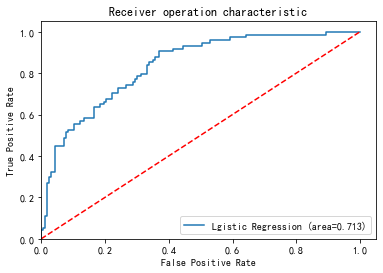

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logrocauc = roc_auc_score(y_test,y_predict)

fpr,tpr,thresholds = roc_curve(y_test,logregression.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label="Lgistic Regression (area=%0.3f)" % logrocauc)
plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation characteristic")
plt.legend(loc="lower right")

plt.show